<a href="https://colab.research.google.com/github/hemantkashniyal/EVA4/blob/master/notebooks/Session8/Session_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pwd

import torch
print(torch.cuda.is_available())

# ! git clone https://github.com/hemantkashniyal/EVA4.git || true
# ! git -C EVA4 pull
# ! cp -r /content/EVA4/notebooks/Session8/* .

/home/jovyan/workspace/notebooks/Session8
False


In [10]:
%env PYTHONDONTWRITEBYTECODE=true
! pip install -r requirements.txt
    

env: PYTHONDONTWRITEBYTECODE=true


In [1]:
%matplotlib inline

import json
from torchsummary import summary
from environs import Env

from torchvision import datasets, transforms
from eva4.config.config import TrainingConfig
env = Env()
env.read_env("./cifar10.experiment.env.txt", recurse=False)

config = TrainingConfig()
print("Experiment Config: ", json.dumps(config, default=lambda x: x.__dict__, sort_keys=False, indent=4))

Experiment Config:  {
    "cuda_available": false,
    "device": "cpu",
    "epochs": 100,
    "desired_accuracy": 80.0,
    "break_on_reaching_desired_accuracy": true,
    "consecutive_desired_accuracy": 3,
    "dataset": {
        "type": "CIFAR10",
        "shuffle": true,
        "num_workers": 1,
        "pin_memory": true,
        "input_size": [
            3,
            32,
            32
        ],
        "input_channel": 3,
        "input_dimension": [
            32,
            32
        ],
        "dataset_std": [
            0.247,
            0.2435,
            0.2616
        ],
        "dataset_mean": [
            0.4914,
            0.4822,
            0.4465
        ]
    },
    "scheduler": {
        "type": "MultiStepLR",
        "milestones": [
            10,
            20,
            35,
            50
        ],
        "gamma": 0.1
    },
    "optimizer": {
        "type": "SGD",
        "learning_rate": 0.1,
        "momentum": 0.9
    },
    "network":

In [2]:
from eva4
train_transforms = None
test_transforms = None

reset_seed()
train_loader, test_loader = get_data_loader(train_transforms, test_transforms, model_config)

train_data_mean, train_data_std = get_mean_std()
test_data_mean, test_data_std = get_mean_std()


ModuleNotFoundError: No module named 'eva4.dataloader'

In [5]:
from imageaug.transforms import Colorspace, RandomAdjustment, RandomRotatedCrop

input_size = model_config.get("input_size")
crop_size = model_config.get("input_dimension")
angle_std = 7 # in degrees


# Define training transforms
train_transforms = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# Define test transforms
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

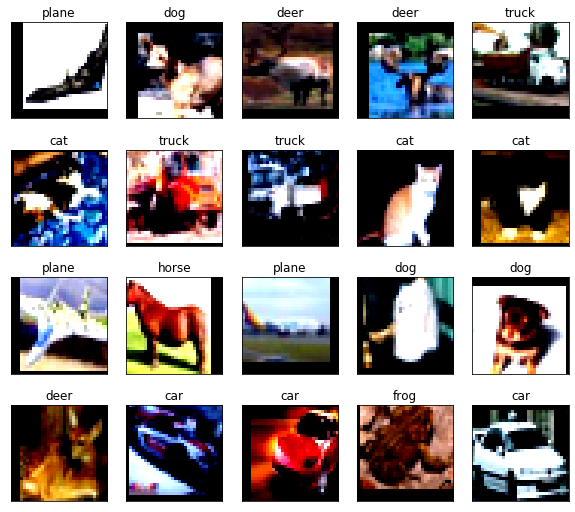

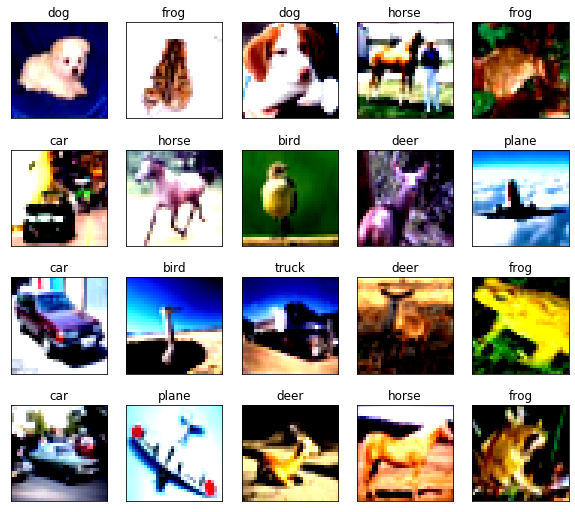

In [6]:
reset_seed()
train_loader, test_loader = get_data_loader(train_transforms, test_transforms, model_config)

# preview a few of the images from training and test
print_data_stats(train_loader, model_config)
print_data_stats(test_loader, model_config)

In [7]:
from eva4.network.resnet import ResNet18
from eva4.optimizer import get_optimizer
from eva4.scheduler import get_scheduler
from eva4.train import start_training

reset_seed()
train_loader, test_loader = get_data_loader(train_transforms, test_transforms, model_config)

# create device/model/optimizer/scheduler based on the experiment config
device = get_device(model_config)

# model contains following convolution blocks 
## input block -> contains dilated convolution and depth separable convolution
## transition block
## internal block 1 -> contains depth separable convolution
## transition block
## internal block 2
## transition block
## output block
model = ResNet18().to(device)
optimizer = get_optimizer(model, model_config)
scheduler = get_scheduler(optimizer, model_config)

input_size = (3,32,32)
summary(model, input_size = input_size)
start_training(model, device, train_loader, test_loader, optimizer, scheduler, model_config)

Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/782 [00:00<?, ?it/s]

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

Loss=-70.30463409423828 Batch_id=5 Accuracy=11.72:   1%|          | 6/782 [00:13<29:17,  2.26s/it]  Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/opt/conda/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/opt/conda/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/opt/conda/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe


KeyboardInterrupt: 